<a href="https://colab.research.google.com/github/hiwasaki1712/ml_edu_notes/blob/main/kmeans_iris_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# アヤメデータをクラスタリング分析するサンプル

典型的な例として、超有名データを代表的な手法でクラスタリングする流れを紹介する。  
* iris データに K-means を適用。
* 各クラスタの特徴を観察

___
K-means  
各データ点を最も近いクラスタ中心に割り当てるクラスタリング手法

irisデータ  
アヤメの花の花弁（petal）とがく（sepal）の長さと幅のデータ


In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import itertools
print (np.__version__)
print (pd.__version__)
print (matplotlib.__version__)
print (sklearn.__version__)

1.26.4
2.2.2
3.7.1
1.5.2


## データの読み込み、可視化、前処理

In [3]:
# Load sample data
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


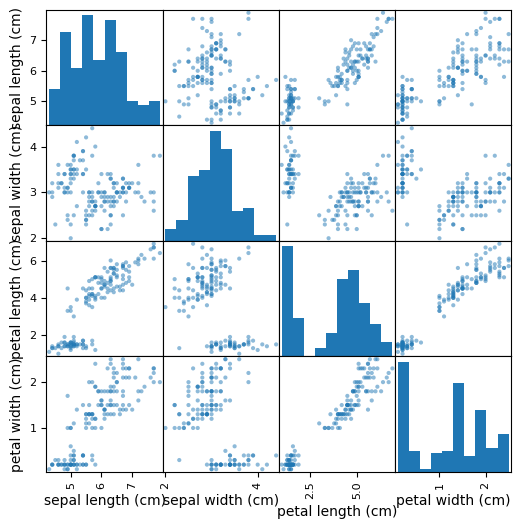

In [4]:
scatter_matrix(df_iris, figsize=(6,6))
plt.show()

In [4]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# 前処理として、データを「標準化 (standardize)」i.e. 分布を平均0、分散1にする
df_iris_normalized = (df_iris - df_iris.mean()) / df_iris.std()
df_iris_normalized.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [6]:
# 各特徴量が、平均0、分散1になっているか確認
df_iris_normalized.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.515825e-15,-1.823726e-15,-1.515825e-15,-8.526513e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.863780e+00,-2.425820e+00,-1.562342e+00,-1.442245e+00
25%,-8.976739e-01,-5.903951e-01,-1.222456e+00,-1.179859e+00
50%,-5.233076e-02,-1.315388e-01,3.353541e-01,1.320673e-01
75%,6.722490e-01,5.567457e-01,7.602115e-01,7.880307e-01
max,2.483699e+00,3.080455e+00,1.779869e+00,1.706379e+00


##クラスタリング

In [6]:
# クラスタリング（クラスタ数は3と指定）
km = KMeans(n_clusters=3)
km.fit(df_iris_normalized)
preds = km.predict(df_iris_normalized)
print (preds)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2]


In [7]:
# クラスタIDをデータ表に追加
df_iris['cluster'] = preds
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [19]:
# クラスタ中心、つまりクラスタ内の平均値を表にする（後で使わないが）。標準化してあるのでcm単位でないことに注意
df_ccenters = pd.DataFrame(km.cluster_centers_, columns=iris.feature_names)
df_ccenters.reset_index(inplace=True)
df_ccenters.rename(columns={'index': 'cluster'}, inplace=True)
df_ccenters

,cluster,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,-0.167843,-0.969450,0.259003,0.174848
1,1,-0.998721,0.903229,-1.298757,-1.252149
2,2,1.030148,0.006118,0.940454,0.969315


## クラスタリング結果の可視化と分析

In [30]:
# 各クラスタに所属するサンプル数は？
df_iris['cluster'].value_counts()

,count
cluster,
2,51
1,50
0,49


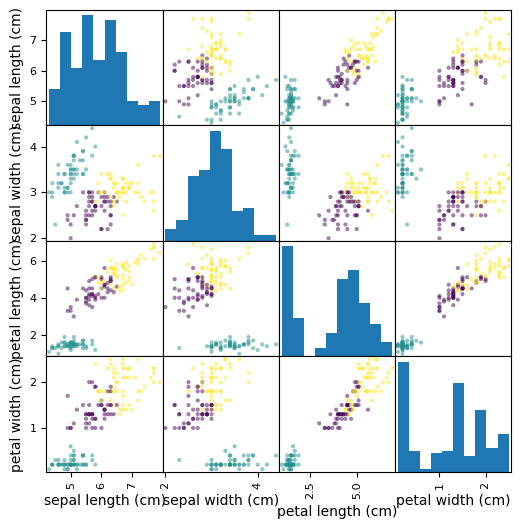

In [61]:
scatter_matrix(df_iris, c=preds, figsize=(6,6))
plt.show()

### クラスタ個々の特徴を見る

In [34]:
# クラスタごとの特徴量の平均は？
df_mean = df_iris.groupby('cluster').mean()
df_mean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.779592,2.653061,4.326531,1.379592
1,5.006000,3.428000,1.462000,0.246000
2,6.725490,3.082353,5.462745,1.960784


In [35]:
# クラスタごとの特徴量の標準偏差は？
df_std = df_iris.groupby('cluster').std()
df_std

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,0.404135,0.252572,0.557814,0.277624
1,0.352490,0.379064,0.173664,0.105386
2,0.515691,0.256676,0.636855,0.338277


### データ全体の分布に対して、クラスタの特徴をみる

In [39]:
# データ全体での各特徴量の平均、標準偏差は？
df_entire_stat = pd.DataFrame({'mean': df_iris.mean(),
                               'std': df_iris.std()},
                              index=df_iris.columns)
df_entire_stat.drop('cluster', inplace=True)
df_entire_stat

,mean,std
sepal length (cm),5.843333,0.828066
sepal width (cm),3.057333,0.435866
petal length (cm),3.758000,1.765298
petal width (cm),1.199333,0.762238


In [40]:
# 全体の平均からのクラスタ平均のずれ
df_mean - df_entire_stat['mean']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,-0.063741,-0.404272,0.568531,0.180259
1,-0.837333,0.370667,-2.296000,-0.953333
2,0.882157,0.025020,1.704745,0.761451


In [41]:
# 偏差値にすると
(df_mean - df_entire_stat['mean']) / df_entire_stat['std'] * 10 + 50

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,49.230237,40.724859,53.220592,52.364860
1,39.888086,58.504137,36.993699,37.492965
2,60.653218,50.574020,59.656981,59.989679


### クラスタ間の関係性を見る

In [62]:
import itertools

unique_ids = pd.unique(preds)
print (unique_ids)

comb_ids = list(itertools.combinations(unique_ids, 2))
print (comb_ids)

[1 2 0]
[(1, 2), (1, 0), (2, 0)]


In [53]:
# 2つのクラスタ間で、各特徴量の平均値の差は？標準偏差の和は？
subs_mean = []
subs_std = []

for comb_id in comb_ids:
    ### 平均
    subs_mean.append(np.abs(df_mean.loc[comb_id[0]] - df_mean.loc[comb_id[1]]))
    ### 標準偏差
    subs_std.append(np.abs(df_std.loc[comb_id[0]] + df_std.loc[comb_id[1]]))

df_mean_diff = pd.DataFrame(subs_mean, index=comb_ids)
df_std_diff = pd.DataFrame(subs_std, index=comb_ids)

df_mean_diff

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
"(1, 2)",1.719490,0.345647,4.000745,1.714784
"(1, 0)",0.773592,0.774939,2.864531,1.133592
"(2, 0)",0.945898,0.429292,1.136214,0.581192


In [54]:
# 平均の差は、標準偏差に対して？
df_mean_diff / df_std_diff

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
"(1, 2)",1.980567,0.543693,4.936029,3.865063
"(1, 0)",1.022425,1.226875,3.916086,2.959699
"(2, 0)",1.028345,0.842992,0.951071,0.943647


In [55]:
# 平均の差と、データ全体の標準偏差と比べると
df_mean_diff / df_entire_stat['std']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
"(1, 2)",2.076513,0.793012,2.266328,2.249671
"(1, 0)",0.934215,1.777928,1.622689,1.487189
"(2, 0)",1.142298,0.984916,0.643639,0.762482
